# EDA

Use this notebook for exploration only.

In [5]:
import sys
from pathlib import Path

# If your notebook lives in fee-discount-uplift/notebooks/
repo_root = Path("..").resolve()
sys.path.insert(0, str(repo_root))

print("Added to sys.path:", repo_root)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data import load_bank_marketing_df, choose_features

df = load_bank_marketing_df()
df.head()

Added to sys.path: /Users/yangqu/-Fee-Discount-Uplift-Optimization/fee-discount-uplift


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
treatment_col = "contact"
outcome_col = "y"

X_df = choose_features(
    df=df,
    treatment_col=treatment_col,
    outcome_col=outcome_col
)

X_df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'month',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [11]:
X_df.shape

(45211, 14)

In [12]:
from src.data import load_and_prepare
from src.propensity import fit_propensity_model, predict_propensity

ds = load_and_prepare(test_size=0.2, random_state=42)

prop_model = fit_propensity_model(ds.X_train, ds.t_train)
prop = predict_propensity(prop_model, ds.X_test)


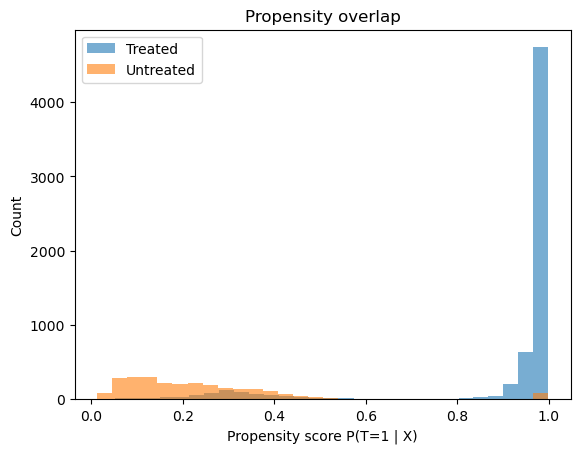

In [13]:
import matplotlib.pyplot as plt

plt.hist(prop[ds.t_test == 1], bins=30, alpha=0.6, label="Treated")
plt.hist(prop[ds.t_test == 0], bins=30, alpha=0.6, label="Untreated")
plt.xlabel("Propensity score P(T=1 | X)")
plt.ylabel("Count")
plt.title("Propensity overlap")
plt.legend()
plt.show()


In [14]:
print("Min propensity:", prop.min())
print("Max propensity:", prop.max())

print("Fraction < 0.05:", (prop < 0.05).mean())
print("Fraction > 0.95:", (prop > 0.95).mean())


Min propensity: 0.01286821131520114
Max propensity: 0.999
Fraction < 0.05: 0.012938184230896826
Fraction > 0.95: 0.5750304102620811
